In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
dftz = pd.read_csv('..\Data\dftz.csv')
df = pd.read_csv('..\Data\df.csv')
#print(dftz)

In [3]:
dftz['Index'] = dftz['Index'].astype('int')
dftz['Index'] = dftz['Index'].astype('str')
df['Index'] = df['Index'].astype('str')
df['Origin (UTC)'] = pd.to_datetime(df['Origin (UTC)'], utc = True)

In [4]:
dftz = dftz.merge(df, on = 'Index', suffixes = ('', '_DEL'))
dftz.drop(columns = ['FID'], inplace = True)
dftz.drop(columns = ['Lat'], inplace = True)
dftz.drop(columns = ['Long'], inplace = True)

In [5]:
#dftz['LocalOffset'] = dftz.apply(lambda x: x['Origin (UTC)'].tz_localize(x['TZID'], nonexistent = 'shift_forward'), axis = 1)
dftz['LocalTime'] = dftz.apply(lambda x: x['Origin (UTC)'].tz_convert(x['TZID']), axis = 1) 

In [6]:
dftz['LocalTime'] = pd.to_datetime(dftz['LocalTime'], utc = True)

In [7]:
dftz['LocalTime'] = dftz.apply(lambda x: x['LocalTime'].tz_localize(None), axis = 1) 

In [8]:
dftz.set_index('LocalTime', inplace = True)

In [9]:
dftz

,Index,TZID,Origin (UTC),Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Country,Deaths
LocalTime,,,,,,,,,,,,,
1902-08-22 03:00:00,12,Asia/Kashgar,1902-08-22 03:00:00+00:00,0.0,7.7,NaN,NaN,NaN,5650.0,NaN,NaN,China,5650.0
1955-04-15 03:40:00,348,Asia/Kashgar,1955-04-15 03:40:00+00:00,35.0,7.1,NaN,NaN,NaN,5.0,NaN,NaN,China,5.0
1969-02-11 22:08:00,477,Asia/Kashgar,1969-02-11 22:08:00+00:00,13.1,7.1,NaN,NaN,NaN,2.0,NaN,NaN,China,2.0
1971-07-26 01:48:00,514,Asia/Kashgar,1971-07-26 01:48:00+00:00,41.1,5.8,NaN,NaN,NaN,1.0,NaN,NaN,China,1.0
1975-01-19 08:02:00,548,Asia/Kashgar,1975-01-19 08:02:00+00:00,5.0,6.8,NaN,47.0,47.0,47.0,47.0,NaN,India,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-10-08 21:44:00,977,Asia/Jayapura,1994-10-08 21:44:00+00:00,17.0,6.8,T,1.0,1.0,1.0,1.0,NaN,Indonesia,1.0
1994-01-21 02:24:00,959,Asia/Jayapura,1994-01-21 02:24:00+00:00,20.0,6.9,NaN,7.0,7.0,7.0,7.0,NaN,Indonesia,7.0
1994-10-04 13:22:00,976,Asia/Ust-Nera,1994-10-04 13:22:00+00:00,14.0,8.3,"T,L",NaN,11.0,11.0,5.0,NaN,Russian Federation,11.0


In [10]:
dftz.sort_values(by = 'Deaths', ascending = False)

,Index,TZID,Origin (UTC),Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Country,Deaths
LocalTime,,,,,,,,,,,,,
1976-07-27 19:42:00,583,Asia/Shanghai,1976-07-27 19:42:00+00:00,16.7,7.6,NaN,655237.0,655237.0,242800.0,242000.0,NaN,China,655237.0
2004-12-26 00:58:00,1237,Asia/Jakarta,2004-12-26 00:58:00+00:00,30.0,9.1,"T,L",NaN,297200.0,NaN,NaN,283000.0,Indonesia,297200.0
1920-12-16 12:05:00,102,Asia/Chongqing,1920-12-16 12:05:00+00:00,25.0,8.6,NaN,NaN,NaN,235502.0,180000.0,NaN,China,235502.0
1927-05-22 22:32:00,140,Asia/Chongqing,1927-05-22 22:32:00+00:00,25.0,7.9,NaN,NaN,NaN,80000.0,200000.0,NaN,China,200000.0
1923-09-01 02:58:00,116,Asia/Tokyo,1923-09-01 02:58:00+00:00,35.0,7.9,"T,F",NaN,NaN,142807.0,143000.0,105000.0,Japan,143000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10-25 12:47:00,1198,Asia/Chongqing,2003-10-25 12:47:00+00:00,13.5,5.8,NaN,NaN,NaN,NaN,NaN,NaN,China,NaN
2008-08-21 12:24:00,1315,Asia/Chongqing,2008-08-21 12:24:00+00:00,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,China,NaN
2008-08-30 08:30:00,1316,Asia/Chongqing,2008-08-30 08:30:00+00:00,10.0,5.7,NaN,NaN,NaN,NaN,NaN,41.0,China,NaN


In [11]:
#dftz.between_time('00:00', '12:00')
#dftz.query('')

dftz.Magnitude.resample('10Y').max()

LocalTime
1900-12-31    7.7
1910-12-31    8.8
1920-12-31    8.6
1930-12-31    8.7
1940-12-31    8.4
1950-12-31    8.6
1960-12-31    9.5
1970-12-31    9.2
1980-12-31    8.3
1990-12-31    8.0
2000-12-31    8.3
2010-12-31    9.1
2020-12-31    9.0
Freq: 10A-DEC, Name: Magnitude, dtype: float64

In [12]:
dftz_agg = dftz.Index.resample('10Y').count()
dftz_agg = pd.DataFrame(dftz_agg)
dftz_agg = dftz_agg.assign(MaxMag=dftz.Magnitude.resample('10Y').max(),
                          MeanMag=dftz.Magnitude.resample('10Y').mean(), 
                          MaxDeaths=dftz.Deaths.resample('10Y').max(),
                          MeanDeaths=dftz.Deaths.resample('10Y').mean(), 
                          SumDeaths=dftz.Deaths.resample('10Y').sum())

dftz_agg = dftz_agg.reset_index()
dftz_agg['Year'] = dftz_agg['LocalTime'].dt.year
dftz_agg.rename(columns = {'LocalTime':'DateRange', 'Index':'Count'}, inplace = True) 
dftz_agg.drop([12], inplace = True)

In [13]:
dftz_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateRange   12 non-null     datetime64[ns]
 1   Count       12 non-null     int64         
 2   MaxMag      12 non-null     float64       
 3   MeanMag     12 non-null     float64       
 4   MaxDeaths   12 non-null     float64       
 5   MeanDeaths  12 non-null     float64       
 6   SumDeaths   12 non-null     float64       
 7   Year        12 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 864.0 bytes


In [14]:
print(dftz_agg)

    DateRange  Count  MaxMag   MeanMag  MaxDeaths   MeanDeaths  SumDeaths  \
0  1900-12-31      3     7.7  6.866667      140.0   140.000000      140.0   
1  1910-12-31     53     8.8  6.892453    82000.0  3493.065217   160681.0   
2  1920-12-31     46     8.6  7.095652   235502.0  8791.514286   307703.0   
3  1930-12-31     65     8.7  6.870769   200000.0  6639.857143   371832.0   
4  1940-12-31     65     8.4  6.953846    60000.0  2744.639344   167423.0   
5  1950-12-31     81     8.6  6.995062   110000.0  2334.701299   179772.0   
6  1960-12-31     77     9.5  6.946753    13100.0   459.972603    33578.0   
7  1970-12-31    103     9.2  6.645631    70000.0  1426.680000   142668.0   
8  1980-12-31    156     8.3  6.441667   655237.0  5206.549669   786189.0   
9  1990-12-31    189     8.0  6.198413    45000.0   598.684783   110158.0   
10 2000-12-31    213     8.3  6.338028    17127.0   307.716981    65236.0   
11 2010-12-31    172     9.1  6.263953   297200.0  3484.025806   540024.0   

In [15]:
dftz_agg.Count.sum()

1223

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

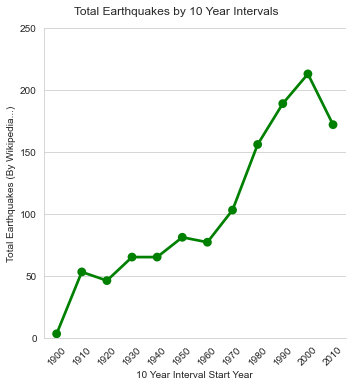

In [16]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'Count', 
            data = dftz_agg, kind = 'point',
               color='g')

g.fig.suptitle('Total Earthquakes by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Total Earthquakes (By Wikipedia...)')

plt.ylim(0,250)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

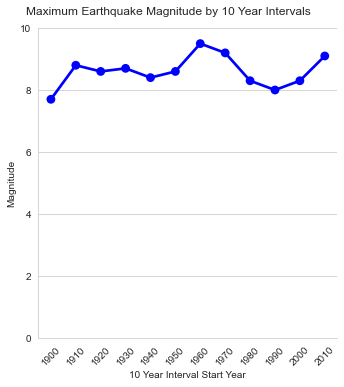

In [17]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'MaxMag', 
            data = dftz_agg, kind = 'point',
               color='b')

g.fig.suptitle('Maximum Earthquake Magnitude by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Magnitude')

plt.ylim(0,10.0)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

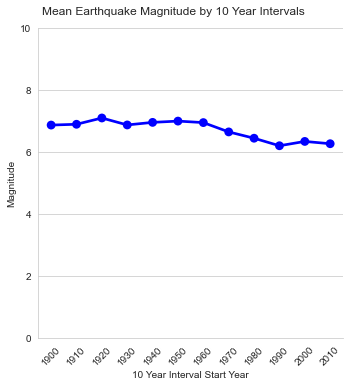

In [18]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'MeanMag', 
            data = dftz_agg, kind = 'point',
               color='b')

g.fig.suptitle('Mean Earthquake Magnitude by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Magnitude')

plt.ylim(0,10.0)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

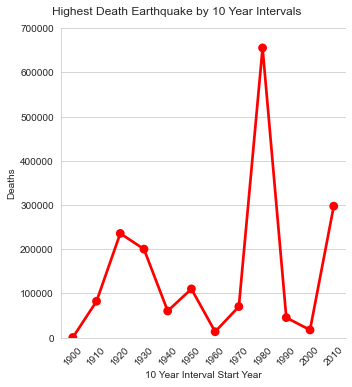

In [19]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'MaxDeaths', 
            data = dftz_agg, kind = 'point',
               color='r')

g.fig.suptitle('Highest Death Earthquake by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Deaths')

plt.ylim(0,700000)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

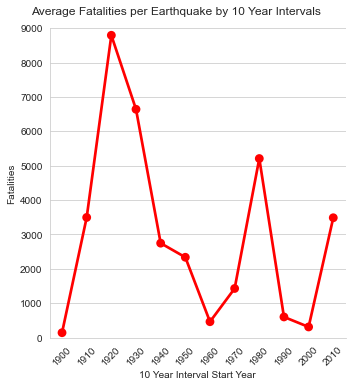

In [20]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'MeanDeaths', 
            data = dftz_agg, kind = 'point',
               color='r')

g.fig.suptitle('Average Fatalities per Earthquake by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Fatalities')

plt.ylim(0,9000)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

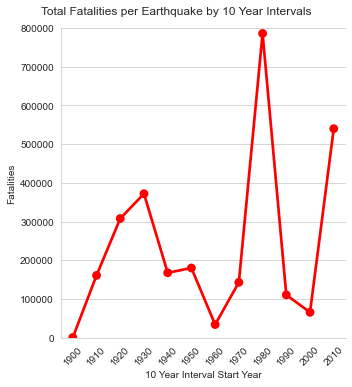

In [21]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Year', y = 'SumDeaths', 
            data = dftz_agg, kind = 'point',
               color='r')

g.fig.suptitle('Total Fatalities per Earthquake by 10 Year Intervals', y=1.03)
g.set(xlabel = '10 Year Interval Start Year')
g.set(ylabel = 'Fatalities')

plt.ylim(0,800000)
plt.xticks(rotation = 45)

In [22]:
print(dftz)

                    Index                 TZID              Origin (UTC)  \
LocalTime                                                                  
1902-08-22 03:00:00    12         Asia/Kashgar 1902-08-22 03:00:00+00:00   
1955-04-15 03:40:00   348         Asia/Kashgar 1955-04-15 03:40:00+00:00   
1969-02-11 22:08:00   477         Asia/Kashgar 1969-02-11 22:08:00+00:00   
1971-07-26 01:48:00   514         Asia/Kashgar 1971-07-26 01:48:00+00:00   
1975-01-19 08:02:00   548         Asia/Kashgar 1975-01-19 08:02:00+00:00   
...                   ...                  ...                       ...   
1994-10-08 21:44:00   977        Asia/Jayapura 1994-10-08 21:44:00+00:00   
1994-01-21 02:24:00   959        Asia/Jayapura 1994-01-21 02:24:00+00:00   
1994-10-04 13:22:00   976        Asia/Ust-Nera 1994-10-04 13:22:00+00:00   
1918-09-07 17:15:00    95        Asia/Ust-Nera 1918-09-07 17:15:00+00:00   
1982-09-29 05:50:00   701  America/Tegucigalpa 1982-09-29 05:50:00+00:00   

           

In [23]:
#Create Simplified df for computing of agg stats

dftz_TOD = dftz.Deaths.resample('8H').sum()
dftz_TOD = pd.DataFrame(dftz_TOD)

In [24]:
print(dftz)

                    Index                 TZID              Origin (UTC)  \
LocalTime                                                                  
1902-08-22 03:00:00    12         Asia/Kashgar 1902-08-22 03:00:00+00:00   
1955-04-15 03:40:00   348         Asia/Kashgar 1955-04-15 03:40:00+00:00   
1969-02-11 22:08:00   477         Asia/Kashgar 1969-02-11 22:08:00+00:00   
1971-07-26 01:48:00   514         Asia/Kashgar 1971-07-26 01:48:00+00:00   
1975-01-19 08:02:00   548         Asia/Kashgar 1975-01-19 08:02:00+00:00   
...                   ...                  ...                       ...   
1994-10-08 21:44:00   977        Asia/Jayapura 1994-10-08 21:44:00+00:00   
1994-01-21 02:24:00   959        Asia/Jayapura 1994-01-21 02:24:00+00:00   
1994-10-04 13:22:00   976        Asia/Ust-Nera 1994-10-04 13:22:00+00:00   
1918-09-07 17:15:00    95        Asia/Ust-Nera 1918-09-07 17:15:00+00:00   
1982-09-29 05:50:00   701  America/Tegucigalpa 1982-09-29 05:50:00+00:00   

           

In [25]:
#Create an hour column for counting daytime and nightime

dftz_TOD = dftz_TOD.reset_index()
dftz_TOD['Hour'] = dftz_TOD['LocalTime'].dt.hour

#Reorder the original df for plotting

dftz = dftz.reset_index()
dftz['Hour'] = dftz['LocalTime'].dt.hour

In [41]:
#Total number of earthquakes during the nighttime

dftz.query('Hour > 16 or Hour < 9')['Index'].count()

845

In [42]:
#Total number of earthquakes during the daytime

dftz.query('Hour > 8 and Hour <16')['Index'].count()

341

In [57]:
print(dftz)

               LocalTime Index                 TZID              Origin (UTC)  \
0    1902-08-22 03:00:00    12         Asia/Kashgar 1902-08-22 03:00:00+00:00   
1    1955-04-15 03:40:00   348         Asia/Kashgar 1955-04-15 03:40:00+00:00   
2    1969-02-11 22:08:00   477         Asia/Kashgar 1969-02-11 22:08:00+00:00   
3    1971-07-26 01:48:00   514         Asia/Kashgar 1971-07-26 01:48:00+00:00   
4    1975-01-19 08:02:00   548         Asia/Kashgar 1975-01-19 08:02:00+00:00   
...                  ...   ...                  ...                       ...   
1222 1994-10-08 21:44:00   977        Asia/Jayapura 1994-10-08 21:44:00+00:00   
1223 1994-01-21 02:24:00   959        Asia/Jayapura 1994-01-21 02:24:00+00:00   
1224 1994-10-04 13:22:00   976        Asia/Ust-Nera 1994-10-04 13:22:00+00:00   
1225 1918-09-07 17:15:00    95        Asia/Ust-Nera 1918-09-07 17:15:00+00:00   
1226 1982-09-29 05:50:00   701  America/Tegucigalpa 1982-09-29 05:50:00+00:00   

      Depth (km)  Magnitude

In [68]:
#Create day and night flags in the original dataframe

conditions = [(dftz['Hour'] > 8) & (dftz['Hour'] < 17), 
              (dftz['Hour'] < 9), 
              (dftz['Hour'] > 16)]
values = ['Day', 'Night', 'Night']

dftz['TOD'] = np.select(conditions, values) 

In [69]:
print(dftz)

               LocalTime Index                 TZID              Origin (UTC)  \
0    1902-08-22 03:00:00    12         Asia/Kashgar 1902-08-22 03:00:00+00:00   
1    1955-04-15 03:40:00   348         Asia/Kashgar 1955-04-15 03:40:00+00:00   
2    1969-02-11 22:08:00   477         Asia/Kashgar 1969-02-11 22:08:00+00:00   
3    1971-07-26 01:48:00   514         Asia/Kashgar 1971-07-26 01:48:00+00:00   
4    1975-01-19 08:02:00   548         Asia/Kashgar 1975-01-19 08:02:00+00:00   
...                  ...   ...                  ...                       ...   
1222 1994-10-08 21:44:00   977        Asia/Jayapura 1994-10-08 21:44:00+00:00   
1223 1994-01-21 02:24:00   959        Asia/Jayapura 1994-01-21 02:24:00+00:00   
1224 1994-10-04 13:22:00   976        Asia/Ust-Nera 1994-10-04 13:22:00+00:00   
1225 1918-09-07 17:15:00    95        Asia/Ust-Nera 1918-09-07 17:15:00+00:00   
1226 1982-09-29 05:50:00   701  America/Tegucigalpa 1982-09-29 05:50:00+00:00   

      Depth (km)  Magnitude

In [29]:
dftz_TOD.loc[dftz_TOD['Hour'] == 0, 'Deaths'].sum()

1051873.0

In [30]:
dftz_TOD.loc[dftz_TOD['Hour'] == 8, 'Deaths'].sum()

424124.0

In [31]:
dftz_TOD.loc[dftz_TOD['Hour'] == 16, 'Deaths'].sum()

1389407.0

In [32]:
dftz_TOD.query('Hour == 0 or Hour == 8')['Deaths'].sum()

1475997.0

In [33]:
#Average nightime deaths per nighttime earthquake

dftz_TOD.query('Hour == 0 or Hour == 8')['Deaths'].sum()/dftz_TOD.query('(Hour == 0 or Hour == 8) and (Deaths >= 1)')['Deaths'].count()

1965.375499334221

In [34]:
#Average daytime deaths per daytime earthquake

dftz_TOD.loc[dftz_TOD['Hour'] == 16, 'Deaths'].sum()/dftz_TOD.query('Hour == 16 and Deaths >=1')['Deaths'].count()

3618.2473958333335

In [49]:
d1 = {'Time': ['Day', 'Night'], 'Deaths': [1389407, 1475997], 'AverageDeaths': [3618.25,1965.38], 'TotalEQs': [341,845], 'WeightedEQs': [341,422.5], 'PercEQs': [0.2875,0.7125]}
dftz_TOD = pd.DataFrame(data=d1)

In [50]:
print(dftz_TOD)

    Time   Deaths  AverageDeaths  TotalEQs  WeightedEQs  PercEQs
0    Day  1389407        3618.25       341        341.0   0.2875
1  Night  1475997        1965.38       845        422.5   0.7125


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

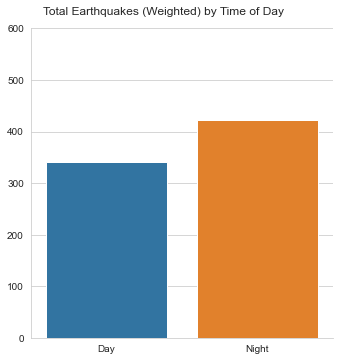

In [56]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Time', y = 'WeightedEQs', 
            data = dftz_TOD, kind = 'bar',)

g.fig.suptitle('Total Earthquakes (Weighted) by Time of Day', y=1.03)
g.set(xlabel = '')
g.set(ylabel = '')

plt.ylim(0,600)
plt.xticks(rotation = 0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

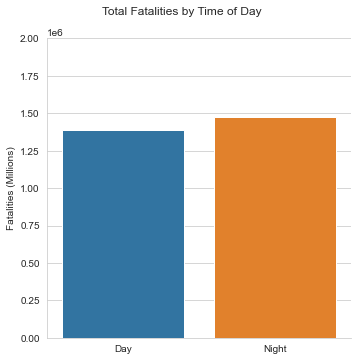

In [36]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Time', y = 'Deaths', 
            data = dftz_TOD, kind = 'bar',)

g.fig.suptitle('Total Fatalities by Time of Day', y=1.03)
g.set(xlabel = '')
g.set(ylabel = 'Fatalities (Millions)')

plt.ylim(0,2000000)
plt.xticks(rotation = 0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

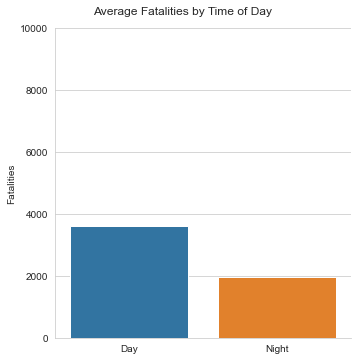

In [37]:
sns.set_style('whitegrid')

g = sns.catplot(x = 'Time', y = 'AverageDeaths', 
            data = dftz_TOD, kind = 'bar',)

g.fig.suptitle('Average Fatalities by Time of Day', y=1.03)
g.set(xlabel = '')
g.set(ylabel = 'Fatalities')

plt.ylim(0,10000)
plt.xticks(rotation = 0)

[Text(0, 0.5, 'Fatalities'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Fatality Distribution Across Time of Day')]

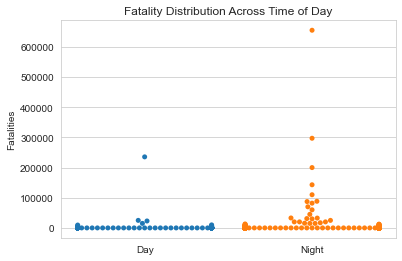

In [84]:
sns.set_style('whitegrid')

g = sns.swarmplot(x = 'TOD', y = 'Deaths', 
            data = dftz, order = ['Day', 'Night'], )

g.set(xlabel = '', ylabel = 'Fatalities', title = 'Fatality Distribution Across Time of Day')
#g.set(yscale="log")